TASK 1

In [ ]:
# Importerer Pandas til datahåndtering og analyse
import pandas as pd  

# Importerer NumPy til numeriske beregninger og array-håndtering
import numpy as np  

# Importerer Matplotlib til datavisualisering
import matplotlib.pyplot as plt  

# Importerer Seaborn, som bygger oven på Matplotlib, til flottere statistiske visualiseringer
import seaborn as sns

In [ ]:
# Læser CSV-filen "estat_sdg_08_10_en.csv" ind i en pandas DataFrame
df = pd.read_csv("estat_sdg_08_10_en.csv")

In [ ]:
# Viser de første 5 rækker af DataFrame'en for at få et hurtigt overblik over dataene
print(df.head())

# Viser en oversigt over DataFrame'en, herunder antallet af ikke-null værdier, datatype for hver kolonne osv.
print(df.info())

# Giver statistisk beskrivelse af de numeriske kolonner (fx gennemsnit, std-afvigelse, min, max osv.)
print(df.describe())

# Giver en statistisk beskrivelse af de kategoriske (object) kolonner, fx antal unikke værdier, mest almindelige værdi (top) og dens frekvens
print(df.describe(include=['object']))

               DATAFLOW        LAST UPDATE    freq  \
0  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
1  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
2  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
3  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
4  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   

                                           unit  \
0  Chain linked volumes (2020), euro per capita   
1  Chain linked volumes (2020), euro per capita   
2  Chain linked volumes (2020), euro per capita   
3  Chain linked volumes (2020), euro per capita   
4  Chain linked volumes (2020), euro per capita   

                                   na_item      geo  TIME_PERIOD  OBS_VALUE  \
0  Gross domestic product at market prices  Albania         2019     4850.0   
1  Gross domestic product at market prices  Albania         2020     4710.0   
2  Gross domestic product at market prices  Albania         2021     5190.0   
3  Gross domestic product at market prices  Albania 

In [ ]:
# Udskriver antallet af manglende værdier (NaN) i hver kolonne i DataFrame'en
print(df.isnull().sum())

DATAFLOW          0
LAST UPDATE       0
freq              0
unit              0
na_item           0
geo               0
TIME_PERIOD       0
OBS_VALUE         0
OBS_FLAG       1664
CONF_STATUS    1791
dtype: int64


Følgende kode udfylder manglende numeriske værdier ved at interpolere dem og udfylder manglende kategoriske data med den mest hyppige værdi (mode). Det er vigtigt at nævne, hvordan interpolering kan hjælpe med at bevare datatrends, mens det at bruge den hyppigste værdi kan være nyttigt, hvis der er en skæv fordeling af kategorierne.

In [ ]:
# Udfylder manglende værdier i det numeriske data ved lineær interpolation
df.interpolate(inplace=True)

# Gennemgår alle kolonner med datatype 'object' (typisk kategoriske eller tekstdata)
for col in df.select_dtypes(include=['object']).columns:
    # Udfylder manglende værdier i den pågældende kolonne med den mest forekommende værdi (mode)
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\olive\AppData\Local\Temp\ipykernel_56260\3969881392.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)
C:\Users\olive\AppData\Local\Temp\ipykernel_56260\3969881392.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Definerer en tærskelværdi for manglende data – hvis en kolonne har mindre end 50% af værdierne udfyldt, fjernes den
threshold = len(df) * 0.5  

# Fjerner kolonner, hvor antallet af ikke-NaN værdier er under tærsklen
df.dropna(axis=1, thresh=threshold, inplace=True)  

Følgende er en metode til at fjerne outliers ved hjælp af interkvartilintervallet (IQR). Det er en meget effektiv måde at fjerne ekstreme værdier på, som kan skæve analyser og modeller.

In [ ]:
# Funktion til at fjerne outliers i en given kolonne baseret på interkvartilafstanden (IQR)
def remove_outliers(df, column):
    # Beregner første kvartil (25%) og tredje kvartil (75%)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Beregner interkvartilafstanden (IQR)
    IQR = Q3 - Q1
    
    # Definerer nedre og øvre grænser for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrerer rækker, hvor værdierne ligger inden for de acceptable grænser
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Anvender outlier-fjernelsesfunktionen på alle numeriske kolonner i DataFrame'en
for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, col)

In [ ]:
# Udskriver datatyperne for hver kolonne i DataFrame'en
print(df.dtypes)

DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
na_item         object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG        object
dtype: object


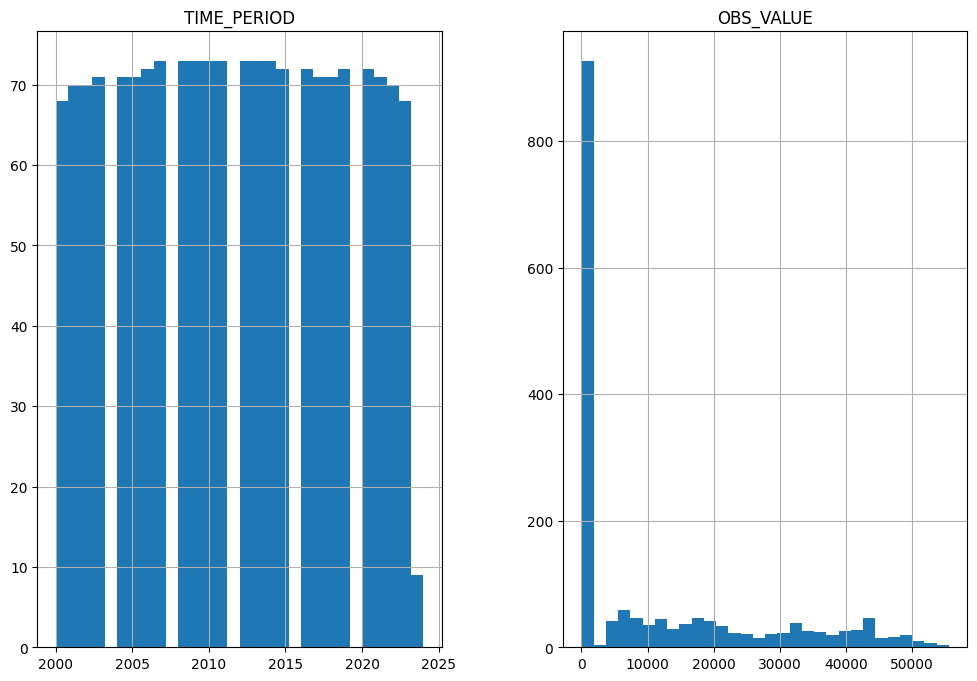

In [ ]:
# Genererer histogrammer for alle numeriske kolonner i DataFrame'en
df.hist(figsize=(12, 8), bins=30)

# Viser histogrammerne
plt.show()

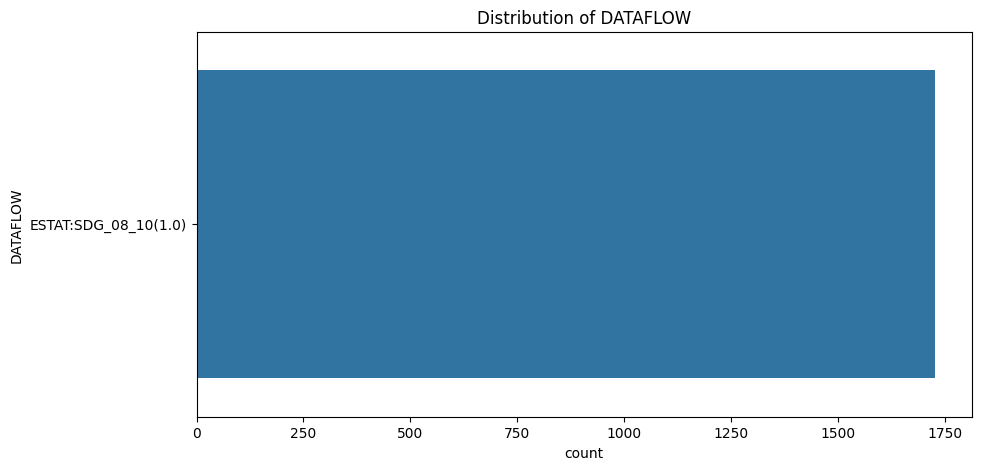

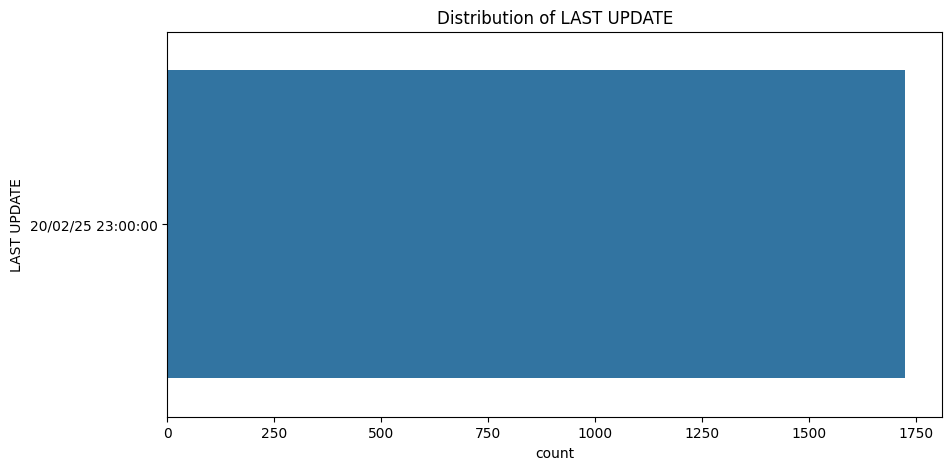

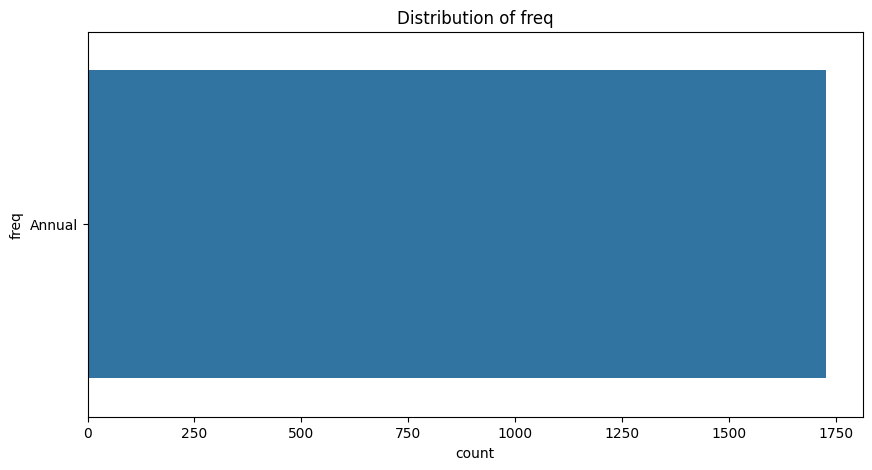

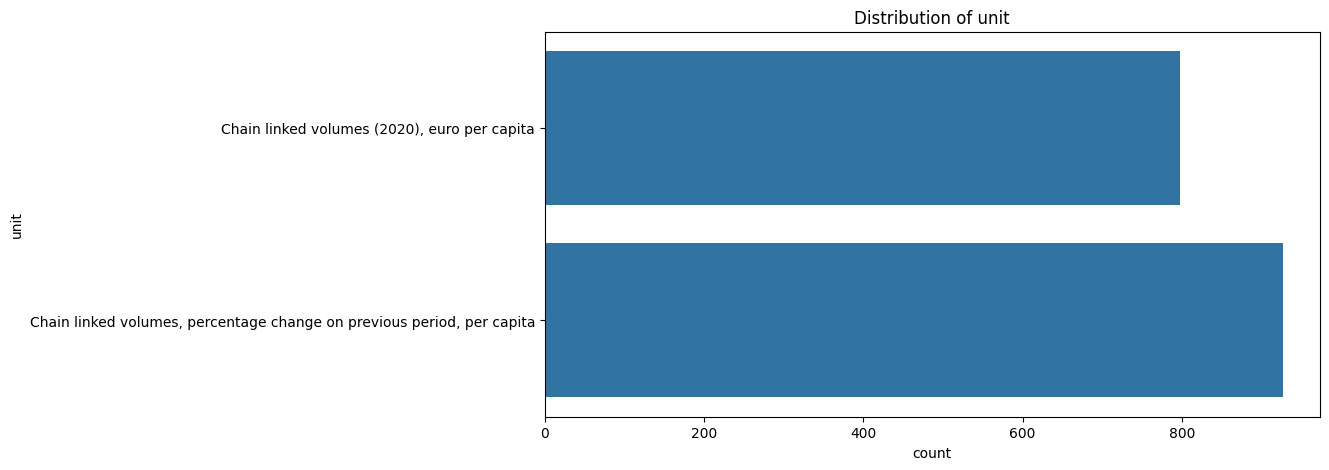

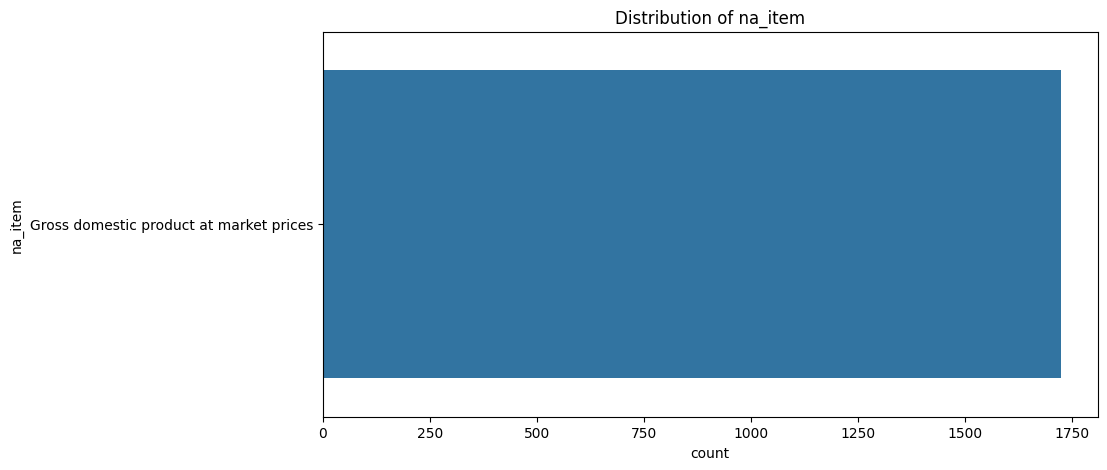

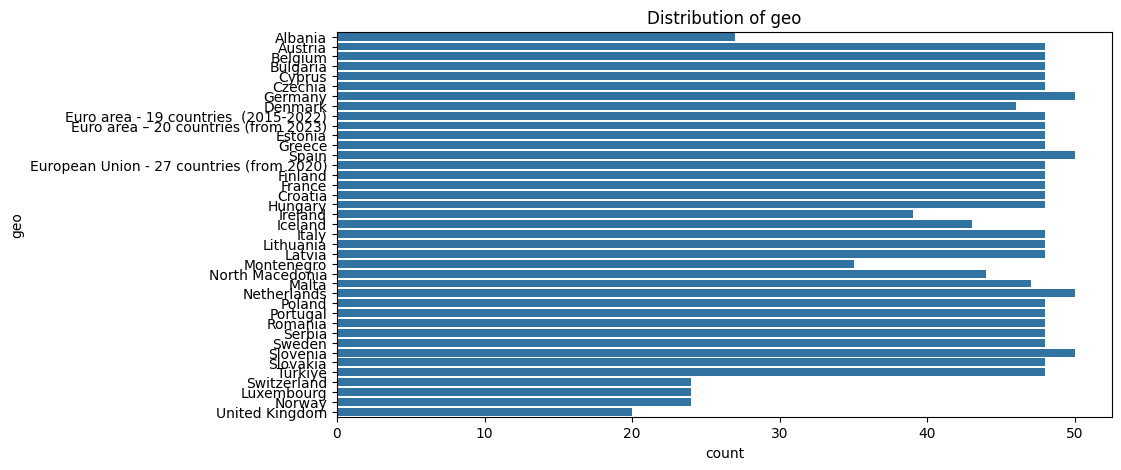

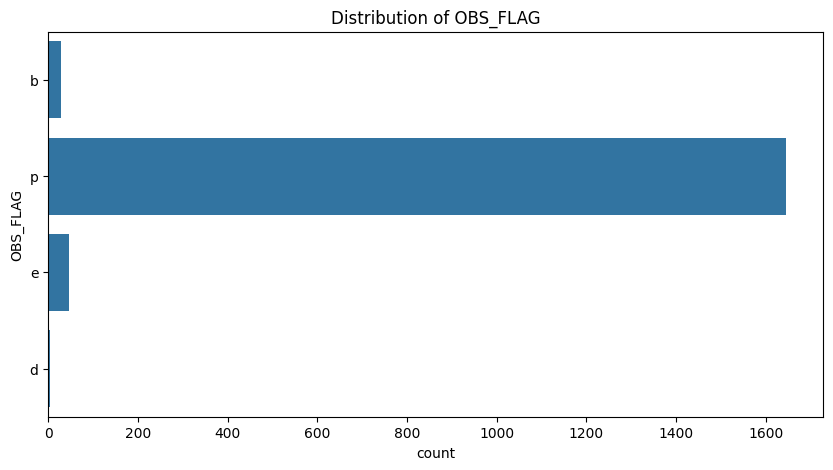

In [ ]:
# Gennemgår alle kolonner med datatype 'object' (typisk kategoriske eller tekstdata)
for col in df.select_dtypes(include=['object']).columns:
    # Opretter en figur med angivet størrelse (10x5 tommer)
    plt.figure(figsize=(10, 5))
    
    # Opretter et tælleplot for den aktuelle kolonne (vises horisontalt med 'y' akse)
    sns.countplot(y=df[col])
    
    # Sætter en titel på grafen, der angiver hvilken kolonne der visualiseres
    plt.title(f"Distribution of {col}")
    
    # Viser plottet
    plt.show()

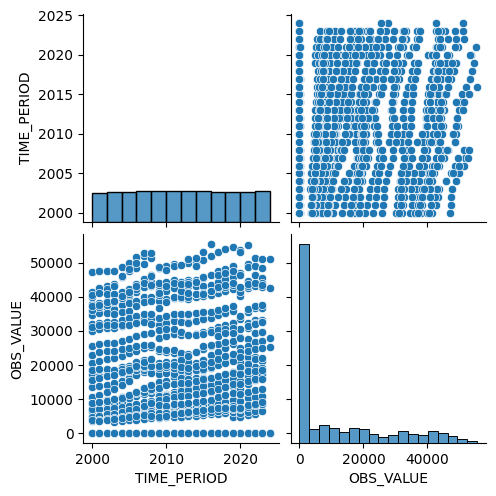

In [ ]:
# Opretter et pairplot (scatter matrix) for alle numeriske kolonner i DataFrame'en
sns.pairplot(df.select_dtypes(include=[np.number]))

# Viser plottet
plt.show()

TASK 2

Følgende kode opdeler en kontinuerlig variabel "OBS_VALUE" i tre kategorier (low, medium, high) ved hjælp af binning. Det er en god metode, når du har behov for at segmentere data, hvilket kan være nyttigt til analyse eller visualisering.

In [ ]:
# Definerer bin-grænserne baseret på minimum, kvartiler og maksimum af 'OBS_VALUE' kolonnen
bins = [df["OBS_VALUE"].min(), df["OBS_VALUE"].quantile(0.33), df["OBS_VALUE"].quantile(0.66), df["OBS_VALUE"].max()]

# Definerer labels for de tre bins (Low, Medium, High)
labels = ["Low", "Medium", "High"]

# Opretter en ny kolonne "OBS_VALUE_Binned", som indeholder kategorier baseret på de definerede bins
df["OBS_VALUE_Binned"] = pd.cut(df["OBS_VALUE"], bins=bins, labels=labels, include_lowest=True)

# Udskriver de første rækker af både "OBS_VALUE" og "OBS_VALUE_Binned" for at vise resultatet
print(df[["OBS_VALUE", "OBS_VALUE_Binned"]].head())

   OBS_VALUE OBS_VALUE_Binned
0     4850.0           Medium
1     4710.0           Medium
2     5190.0           Medium
3     5500.0           Medium
4    37880.0             High


In [ ]:
# Opretter dummy-variabler (enkeltværdier) for kolonnen "geo" og tilføjer præfikset "geo" til de nye kolonner
df_encoded = pd.get_dummies(df, columns=["geo"], prefix="geo")

# Udskriver de første rækker af den kodede DataFrame for at vise resultatet
print(df_encoded.head())

               DATAFLOW        LAST UPDATE    freq  \
0  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
1  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
2  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
3  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
4  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   

                                           unit  \
0  Chain linked volumes (2020), euro per capita   
1  Chain linked volumes (2020), euro per capita   
2  Chain linked volumes (2020), euro per capita   
3  Chain linked volumes (2020), euro per capita   
4  Chain linked volumes (2020), euro per capita   

                                   na_item  TIME_PERIOD  OBS_VALUE OBS_FLAG  \
0  Gross domestic product at market prices         2019     4850.0        b   
1  Gross domestic product at market prices         2020     4710.0        p   
2  Gross domestic product at market prices         2021     5190.0        p   
3  Gross domestic product at market prices         2

In [ ]:
# Udskriver gennemsnittet (mean) for de numeriske kolonner i DataFrame'en
print("Mean:\n", df.mean(numeric_only=True))

# Udskriver medianen for de numeriske kolonner i DataFrame'en
print("Median:\n", df.median(numeric_only=True))

# Udskriver standardafvigelsen (standard deviation) for de numeriske kolonner i DataFrame'en
print("Standard Deviation:\n", df.std(numeric_only=True))

Mean:
 TIME_PERIOD     2011.572174
OBS_VALUE      11254.810435
dtype: float64
Median:
 TIME_PERIOD    2012.0
OBS_VALUE         7.1
dtype: float64
Standard Deviation:
 TIME_PERIOD        6.906496
OBS_VALUE      15489.579333
dtype: float64


In [ ]:
# Gennemgår alle kolonner med datatype 'object' (typisk kategoriske eller tekstdata)
for col in df.select_dtypes(include=['object']).columns:
    # Udskriver antallet af forekomster for hver kategori i den aktuelle kolonne
    print(f"\nCategory Counts for {col}:\n", df[col].value_counts())


Category Counts for DATAFLOW:
 DATAFLOW
ESTAT:SDG_08_10(1.0)    1725
Name: count, dtype: int64

Category Counts for LAST UPDATE:
 LAST UPDATE
20/02/25 23:00:00    1725
Name: count, dtype: int64

Category Counts for freq:
 freq
Annual    1725
Name: count, dtype: int64

Category Counts for unit:
 unit
Chain linked volumes, percentage change on previous period, per capita    927
Chain linked volumes (2020), euro per capita                              798
Name: count, dtype: int64

Category Counts for na_item:
 na_item
Gross domestic product at market prices    1725
Name: count, dtype: int64

Category Counts for geo:
 geo
Slovenia                                     50
Germany                                      50
Netherlands                                  50
Spain                                        50
Hungary                                      48
Croatia                                      48
Sweden                                       48
Serbia                              

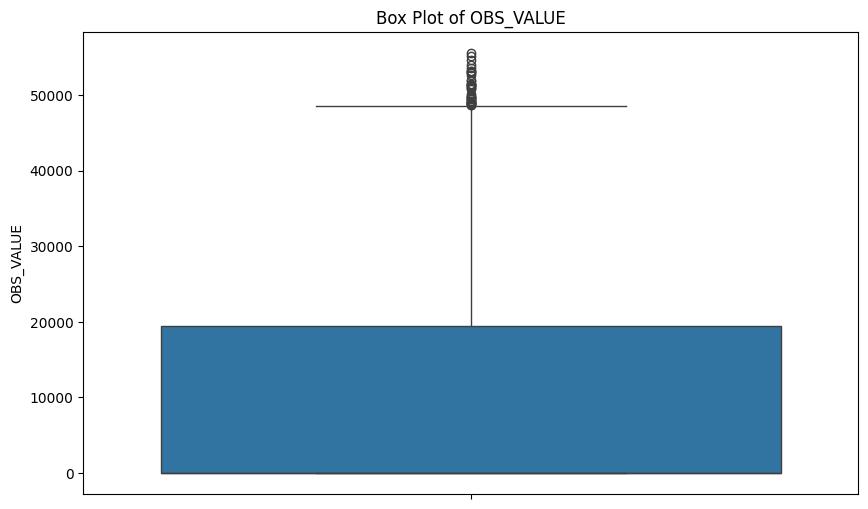

In [ ]:
# Opretter en figur med en størrelse på 10x6 tommer
plt.figure(figsize=(10, 6))

# Opretter et boxplot for 'OBS_VALUE' kolonnen
sns.boxplot(y=df["OBS_VALUE"])

# Sætter en titel på grafen
plt.title("Box Plot of OBS_VALUE")

# Viser plottet
plt.show()

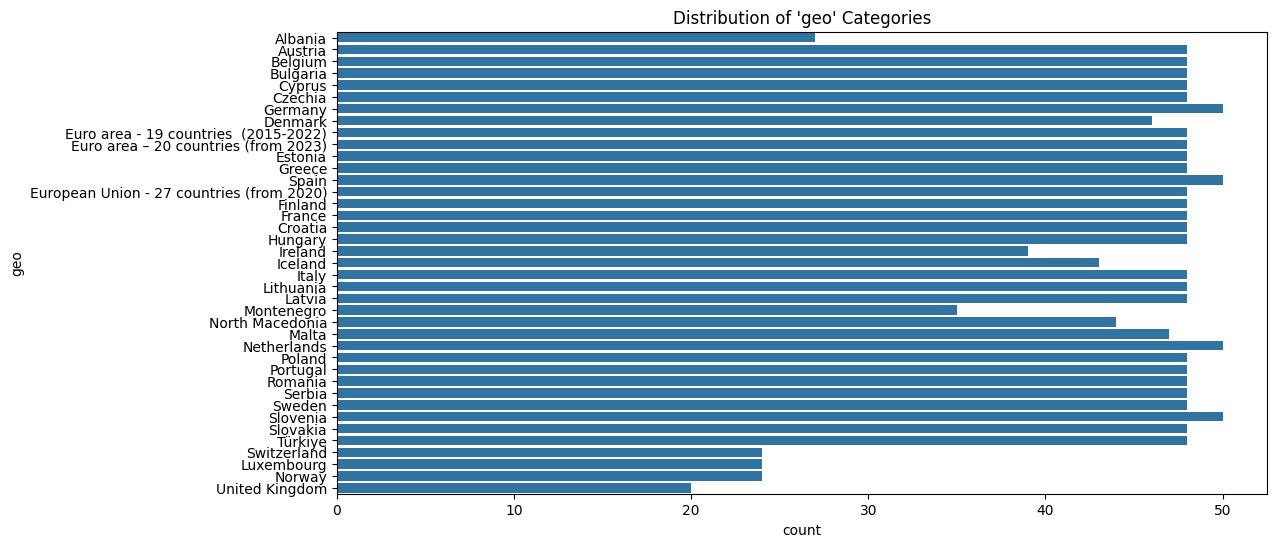

In [ ]:
# Opretter en figur med en størrelse på 12x6 tommer
plt.figure(figsize=(12, 6))

# Opretter et countplot for 'geo' kolonnen (viser antallet af hver kategori)
sns.countplot(y=df["geo"])

# Sætter en titel på plottet for at beskrive det
plt.title("Distribution of 'geo' Categories")

# Viser plottet
plt.show()

TASK 3

In [ ]:
# Udvælger de specifikke kolonner ("geo", "TIME_PERIOD", "OBS_VALUE") fra DataFrame'en
df_selected = df[["geo", "TIME_PERIOD", "OBS_VALUE"]]

# Udskriver de første rækker af den nye DataFrame for at vise de udvalgte kolonner
print(df_selected.head())

       geo  TIME_PERIOD  OBS_VALUE
0  Albania         2019     4850.0
1  Albania         2020     4710.0
2  Albania         2021     5190.0
3  Albania         2022     5500.0
4  Austria         2000    37880.0


Neden under anvendes groupby til at aggregere data ved at beregne gennemsnittet af "OBS_VALUE" for hver unik værdi i "geo". Dette er en grundlæggende teknik til at sammenfatte data og få et overblik over, hvordan en variabel ændrer sig på tværs af grupper.

In [ ]:
# Grupperer data efter 'geo' kolonnen og beregner gennemsnittet af 'OBS_VALUE' for hver gruppe
df_grouped = df_selected.groupby("geo")["OBS_VALUE"].mean().reset_index()

# Udskriver de første rækker af den grupperede DataFrame for at vise resultatet
print(df_grouped.head())

        geo     OBS_VALUE
0   Albania    753.966667
1   Austria  21223.583333
2   Belgium  19812.008333
3  Bulgaria   3741.566667
4   Croatia   5955.431250


Følgende kode skaber en scatterplot, som er fremragende til at visualisere forholdet mellem to numeriske variable, samtidig med at kategorierne farves for at vise forskelle mellem geografiske regioner. Scatterplotten giver mulighed for at opdage tendenser eller mønstre i dataene over tid.

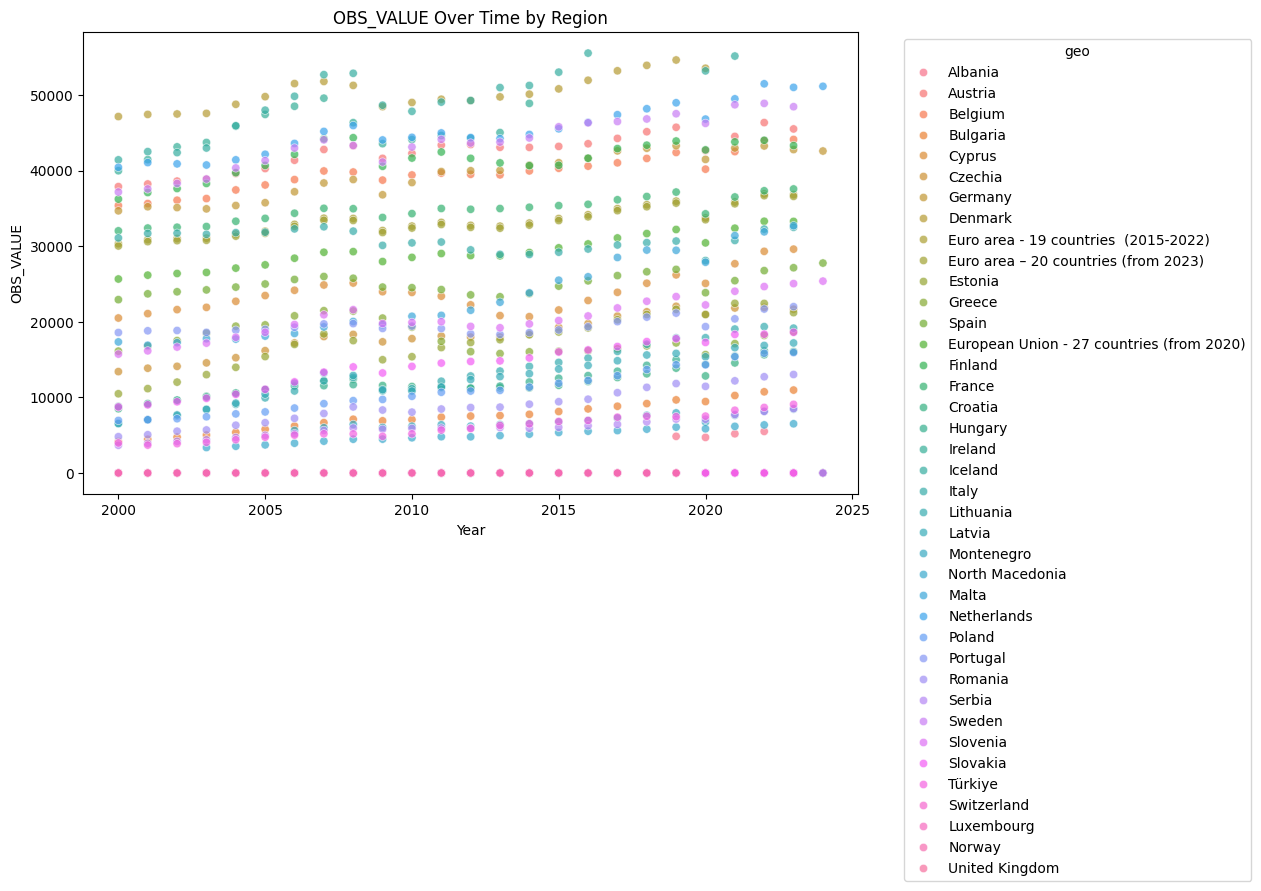

In [ ]:
# Opretter en figur med en størrelse på 10x6 tommer
plt.figure(figsize=(10, 6))

# Opretter et scatterplot, der viser forholdet mellem 'TIME_PERIOD' (år) og 'OBS_VALUE'
# 'hue=df["geo"]' farver punkterne efter regionen (geo), og 'alpha=0.7' gør punkterne lidt gennemsigtige
sns.scatterplot(x=df["TIME_PERIOD"], y=df["OBS_VALUE"], hue=df["geo"], alpha=0.7)

# Sætter en titel på plottet
plt.title("OBS_VALUE Over Time by Region")

# Sætter x- og y-aksens etiketter
plt.xlabel("Year")
plt.ylabel("OBS_VALUE")

# Justerer legenden til at være udenfor plottet, så den ikke dækker dataene
plt.legend(title="geo", bbox_to_anchor=(1.05, 1), loc="upper left")

# Vist grafen
plt.show()

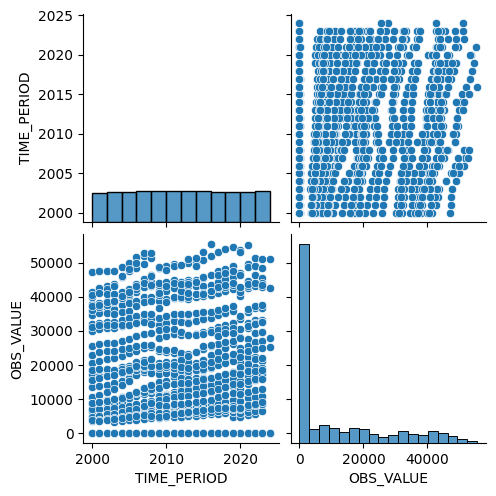

In [ ]:
# Opretter en pairplot for de to kolonner 'TIME_PERIOD' og 'OBS_VALUE' for at visualisere forholdet mellem dem
sns.pairplot(df[["TIME_PERIOD", "OBS_VALUE"]])

# Vist grafen
plt.show()